# 1. Подготовительный этап

**Импортируем датасет в pandas.dataFrame**

In [1]:
import pandas as pd

f = open("data.csv")
d = {"password": [], "strength": []}

for x in f.readlines()[1:]:
    k = "".join(x.split(",")[:-1])
    v = int(x.split(",")[-1][:-1])
    d["password"].append(k)
    d["strength"].append(v)
    
df = pd.DataFrame.from_dict(d)
df

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669874,10redtux10,1
669875,infrared1,1
669876,184520socram,1
669877,marken22a,1


In [2]:
print(len(df))
print(len(df[df['password'].isnull()]))
print(len(df[df['strength'].isnull()]))

669879
0
0


**Количество записей датасета: 669879**\
**Количество отсутствующих значений в столбце password: 0**\
**Количество отсутствующих значений в столбце strength: 0**

**Так как отсутствующих значений нет ни в одном из столбцов, очистка данных не требуется**

**Атрибут password - строковое представление пароля.**\
**Основная его характеристика - количество символов.**

**Атрибут strength - стойкость пароля ко взлому:**\
**0 - слабый (относительно легко взломать)**\
**1 - средний (стойкость средняя)**\
**2 - сильный (взломать сложно)**

**Добавим в датасет следующие признаки:**

**length - длина пароля (количество символов)**\
**digit - признак, отвечающий за содержание цифр в пароле (0 - нет, 1 - да)**\
**lower & upper - содержит ли пароль одновременно заглавные и строчные буквы (0 - нет, 1 - да)**\
**other symbols - содержит ли пароль особые символы (0 - нет, 1 - да)**

In [3]:
df['length'] = df.apply(lambda x: len(x["password"]), axis=1)

In [4]:
def is_digit_in_password(password):
    for x in password:
        if x in "0123456789":
            return 1
    return 0
df["digit"] = df.apply(lambda x: is_digit_in_password(x["password"]), axis=1)

In [5]:
def lower_upper(password):
    if not(password.lower() == password or password.upper() == password):
        return 1
    return 0
df["lower & upper"] = df.apply(lambda x: lower_upper(x["password"]), axis=1)

In [6]:
def other_symbols(password):
    for x in password:
        if x not in "0123456789" and x not in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" and x not in "ABCDEFGHIJKLMNOPQRSTUVWXYZ".lower():
            return 1
    return 0
df["other_symbols"] = df.apply(lambda x: other_symbols(x["password"]), axis=1)

# 2. Анализ данных

**Для наглядности выведем на экран 20 случайных записей нашего dataframe**

In [7]:
df.sample(n=20)

,password,strength,length,digit,lower & upper,other_symbols
322783,divorced1,1,9,1,0,0
350812,haktan178,1,9,1,0,0
90432,marios900zaf,1,12,1,0,0
350389,g11977407,1,9,1,0,0
635158,ghasem200,1,9,1,0,0
32297,inparadise129,1,13,1,0,0
632316,kUv7QezYzNwBcgbf,2,16,1,1,0
184037,dedicare06,1,10,1,0,0
544622,aQ6x9qDA5Mg03zMP,2,16,1,1,0
269381,mono1984,1,8,1,0,0


**Признак strength - стойкость пароля ко взлому по шкале от 0 до 2.**

**Изобразим на круговой диаграмме частотность каждой из оценки частотности паролей:**

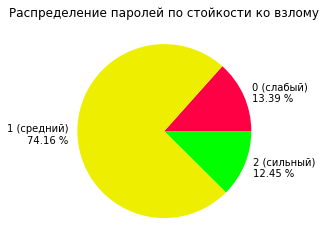

In [8]:
import matplotlib.pyplot as plt

d0 = len(df[df["strength"] == 0]) / len(df) * 100
d1 = len(df[df["strength"] == 1]) / len(df) * 100
d2 = len(df[df["strength"] == 2]) / len(df) * 100

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
vals = [d0, d1, d2]
labels = ['''0 (слабый)
{} %'''.format(round(d0, 2)), 
          '''1 (средний)
{} %'''.format(round(d1, 2)), 
          '''2 (сильный)
{} %'''.format(round(d2, 2))]
colors = ["#F04", "#EE0", "#0F0"]
ax.pie(vals, labels=labels, colors=colors)
plt.title("Распределение паролей по стойкости ко взлому")
plt.show()

**Признак digit отвечает за содержание цифр в пароле (0 - нет, 1 - да).**

**Изобразим на круговой диаграмме частотность паролей с цифрами и без соответственно:**

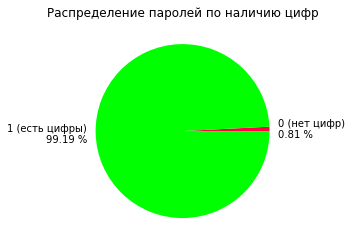

In [9]:
d0 = len(df[df["digit"] == 0]) / len(df) * 100
d1 = len(df[df["digit"] == 1]) / len(df) * 100

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
vals = [d0, d1]
labels = ['''0 (нет цифр)
{} %'''.format(round(d0, 2)), 
          '''1 (есть цифры)
{} %'''.format(round(d1, 2))]
colors = ["#F04", "#0F0"]
ax.pie(vals, labels=labels, colors=colors)
plt.title("Распределение паролей по наличию цифр")
plt.show()

**Признак lower & upper - содержит ли пароль одновременно заглавные и строчные буквы (0 - нет, 1 - да)**

**Изобразим на круговой диаграмме частотность паролей с буквами разных регистров и без них:**

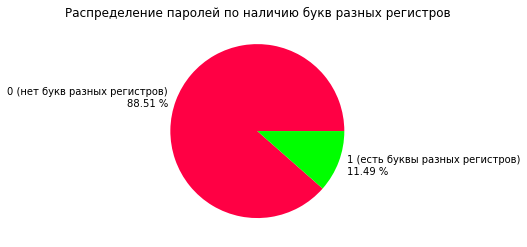

In [10]:
d0 = len(df[df["lower & upper"] == 0]) / len(df) * 100
d1 = len(df[df["lower & upper"] == 1]) / len(df) * 100

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
vals = [d0, d1]
labels = ['''0 (нет букв разных регистров)
{} %'''.format(round(d0, 2)), 
          '''1 (есть буквы разных регистров)
{} %'''.format(round(d1, 2))]
colors = ["#F04", "#0F0"]
ax.pie(vals, labels=labels, colors=colors)
plt.title("Распределение паролей по наличию букв разных регистров")
plt.show()

**Признак other symbols - содержит ли пароль особые символы (0 - нет, 1 - да).**

**Изобразим на круговой диаграмме доли паролей с особыми символами и без них соответственно**

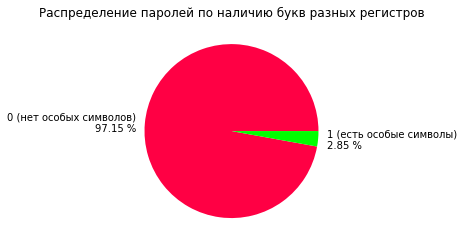

In [11]:
d0 = len(df[df["other_symbols"] == 0]) / len(df) * 100
d1 = len(df[df["other_symbols"] == 1]) / len(df) * 100

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
vals = [d0, d1]
labels = ['''0 (нет особых символов)
{} %'''.format(round(d0, 2)), 
          '''1 (есть особые символы)
{} %'''.format(round(d1, 2))]
colors = ["#F04", "#0F0"]
ax.pie(vals, labels=labels, colors=colors)
plt.title("Распределение паролей по наличию букв разных регистров")
plt.show()

**Признак length - длина пароля (количество символов).**

In [12]:
print(df["length"].min(), df["length"].max())

1 220


**Минимальная длина паролей из выборки - 1, а максимальная - 220.**

**Отобразим частотность использования длин паролей на диаграмме рассеяния**

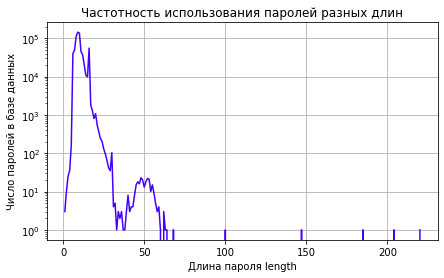

In [13]:
import matplotlib.pyplot as plt

length_count = list(map(lambda x: len(df[df["length"] == x]), [x for x in range(1, 221)]))
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
plt.title("Частотность использования паролей разных длин")
plt.xlabel("Длина пароля length")
plt.ylabel("Число паролей в базе данных")
ax.semilogy([x for x in range(1, 221)], length_count, color="#40F")
ax.grid()

**По графику видно, что наиболее популярны пароли длиной около 10 символов, а пароли длиной более 60-70 символов являются аномалиями и встречаются в единичных случаях. Тем не менее, эти аномалии недостаточно велики, чтобы повлиять на статистические показатели (среднее арифметическое, медиана, мода и другие) показатели огромной выборки.
Поэтому выбрасывать их из датасета не имеет смысла.**

In [14]:
print(length_count.index(max(length_count)) + 1)

9


**Самое популярное значение длины пароля: 9.**

**Для большей наглядности построим ещё столбчатую диаграмму и график:**

In [15]:
def probability(length):
    c = sum(length_count[1:length + 1]) / len(df)
    return c
probability_list = list(map(lambda x: probability(x), [x for x in range(1, 221)]))

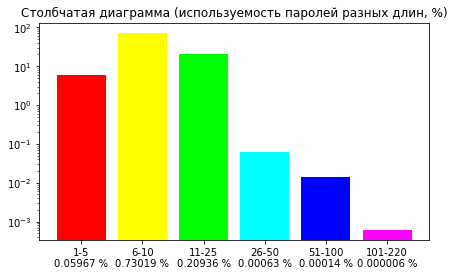

In [16]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
plt.title("Столбчатая диаграмма (используемость паролей разных длин, %)")
v1 = probability(5) - probability(0)
v2 = probability(10) - probability(5)
v3 = probability(25) - probability(10)
v4 = probability(50) - probability(25)
v5 = probability(100) - probability(50)
v6 = probability(220) - probability(100)
values = [100 * x for x in [v1, v2, v3, v4, v5, v6]]
labels = ["1-5\n{} %".format(round(v1, 5)), 
          "6-10\n{} %".format(round(v2, 5)), 
          "11-25\n{} %".format(round(v3, 5)), 
          "26-50\n{} %".format(round(v4, 5)), 
          "51-100\n{} %".format(round(v5, 5)), 
          "101-220\n{} %".format(format(v6, "f"))] 
ax.set_yscale('log')
colors = ["#F00", "#FF0", "#0F0", "#0FF", "#00F", "#F0F"]
plt.bar(labels, values, color=colors)
plt.show()

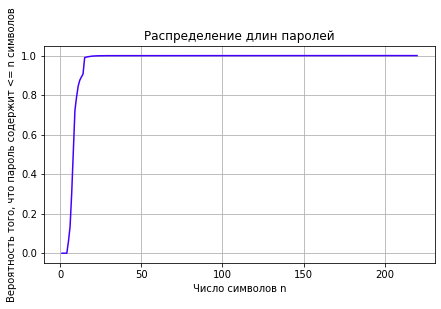

In [17]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
plt.title("Распределение длин паролей")
plt.xlabel("Число символов n")
plt.ylabel("Вероятность того, что пароль содержит <= n символов")
ax.plot([x for x in range(1, 221)], probability_list, color="#40F")
ax.grid()

**Из этих двух графиков мы можем увидеть, что основную массу (>99%) составляют пароли длиной до 25 символов включительно.**

# 3. Построение простых моделей

## Модель I (логистическая регрессия)

**В этой модели мы будем использовать логистическую регрессию - один из методов классификации. Рассмотрим несколько случаев с разным набором факторов.**

**Случай 1**\
**В качестве факторов мы выберем все 4 атрибута пароля: длина, наличие цифр, букв разного регистра и специальных символов**

**Выделим целевую переменную и факторы**

In [18]:
from sklearn.model_selection import train_test_split
X = df.drop("strength", axis=1).drop("password", axis=1)
Y = df.strength

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [21]:
%%time
logistic.fit(X_train, Y_train)

Wall time: 17.4 s


C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
Y_pred = logistic.predict(X_test)

**Здесь и далее при измерении метрик качества мы будем рассматривать 3 метрики - accuracy_score, precision_score и precision_score.**\
**Первая из них выдаёт значение для всего набора данных, а две последние - выдают значение для каждого класса устойчивости 0, 1, 2**

In [23]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test, Y_pred))
print(metrics.precision_score(Y_test, Y_pred, average=None))
print(metrics.f1_score(Y_test, Y_pred, average=None))

0.9998581835552637
[0.99983056 0.99993972 0.99940256]
[0.99974586 0.99990456 0.99970119]


**Случай 2**\
**В качестве фактора возьмём один - длина пароля в символах.**

**Выделим целевую переменную и факторы**

In [24]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("digit", axis=1).drop("lower & upper", axis=1).drop("other_symbols", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [25]:
%%time
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)

Wall time: 12.8 s


LogisticRegression()

In [26]:
Y_pred = logistic.predict(X_test)

In [27]:
print(metrics.accuracy_score(Y_test, Y_pred))
print(metrics.precision_score(Y_test, Y_pred, average=None))
print(metrics.f1_score(Y_test, Y_pred, average=None))

0.9998208634382277
[1.         0.99987883 0.99928418]
[0.99967002 0.99987883 0.99964196]


**Случай 3**\
**Попробуем в качестве фактора использовать наличие букв разных регистров**

In [28]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("digit", axis=1).drop("length", axis=1).drop("other_symbols", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [29]:
%%time
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)

Wall time: 4.07 s


LogisticRegression()

In [30]:
Y_pred = logistic.predict(X_test)

In [31]:
print(metrics.accuracy_score(Y_test, Y_pred))
print(metrics.precision_score(Y_test, Y_pred, average=None))
print(metrics.f1_score(Y_test, Y_pred, average=None))

0.8545560398877411
[0.         0.83651123 0.99406934]
[0.         0.91074034 0.95420707]


C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Случай 4**\
**Попробуем в качестве фактора использовать наличие цифр**

In [32]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("lower & upper", axis=1).drop("length", axis=1).drop("other_symbols", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [33]:
%%time
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)

Wall time: 3.94 s


LogisticRegression()

In [34]:
Y_pred = logistic.predict(X_test)

In [35]:
print(metrics.accuracy_score(Y_test, Y_pred))
print(metrics.precision_score(Y_test, Y_pred, average=None))
print(metrics.f1_score(Y_test, Y_pred, average=None))

0.7421030632352063
[0.         0.74210306 0.        ]
[0.        0.8519623 0.       ]


C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Случай 5**\
**Попробуем в качестве фактора использовать наличие специальных символов**

In [36]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("lower & upper", axis=1).drop("length", axis=1).drop("digit", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [37]:
%%time
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)

Wall time: 2.89 s


LogisticRegression()

In [38]:
Y_pred = logistic.predict(X_test)

In [39]:
print(metrics.accuracy_score(Y_test, Y_pred))
print(metrics.precision_score(Y_test, Y_pred, average=None))
print(metrics.f1_score(Y_test, Y_pred, average=None))

0.7514629485878068
[0.         0.75570325 0.60741321]
[0.         0.8563617  0.22672578]


C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Изобразим метрики accuracy_score для случаев 2-5 в виде DataFrame**

In [40]:
list_accuracy = [0.9998059353914134,
0.8548098166835851,
0.7413044127306383,
0.7491043171911387]
df_accuracy = pd.DataFrame.from_dict({"Модель": [x for x in range(2, 6)],
                                     "Точность": list_accuracy})
df_accuracy

,Модель,Точность
0,2,0.999806
1,3,0.854810
2,4,0.741304
3,5,0.749104


**В случаях 2-5 собой однофакторную классификацию с факторами length, lower & upper, digit и other_symbols соответственно.
Изобразим точность каждой из этих моделей (и соответствующих им факторов) на столбчатой диаграмме**

<BarContainer object of 4 artists>

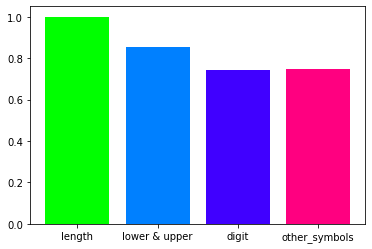

In [41]:
groups = ["length", "lower & upper", "digit", "other_symbols"]
colors = ["#00FF00", "#0080FF", "#4000FF", "#FF0080"]
plt.bar(groups, list_accuracy, color=colors)

**Выяснилось, что классификация в случаях 2 и 3 (с классификацией по фактору длины пароля и наличию букв разных регистров) имеют наибольший "процент попаданий", а случаи 4 и 5 (с классификацией по наличию цифр и специальных символов соответственно) имеют низкую точность: классу 1 принадлежат около 74% данных, поэтому если бы мы обучили модель просто предсказывать класс 1 для каждого случая, результаты сильно бы не отличались от моделей классификаций в случаях 4 и 5.**

**Поэтому рассмотрим ещё классификацию с факторами длины пароля и наличия букв разных регистров.**

**Случай 6**\
**Попробуем в качестве факторов использовать длину пароля и наличиие букв разных регистров**

In [42]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("digit", axis=1).drop("other_symbols", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
logistic = LogisticRegression()

In [43]:
%%time
logistic.fit(X_train, Y_train)

Wall time: 20.8 s


C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
Y_pred = logistic.predict(X_test)

In [45]:
print(metrics.accuracy_score(Y_test, Y_pred))
print(metrics.precision_score(Y_test, Y_pred, average=None))
print(metrics.f1_score(Y_test, Y_pred, average=None))

0.9999477518361498
[0.99983321 0.99998993 0.99982065]
[0.9998888  0.99996474 0.99991032]


In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logistic, X, Y, cv=5)
print(scores.mean())

C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9998910251468309


# 4. Сравнение и анализ моделей

**Теперь найдём оптимальный из этих случаев**

In [47]:
list_accuracy = [0.9998955036722995,
0.9998059353914134,
0.8548098166835851,
0.7413044127306383,
0.7491043171911387,
0.9998880396488924]
time = [17.1, 10.5, 3.86, 3.46, 2.73, 17]
df_accuracy = pd.DataFrame.from_dict({"Случай №": [x for x in range(1, 7)],
                                     "Точность": list_accuracy,
                                     "Временные затраты": time})
df_accuracy

,Случай №,Точность,Временные затраты
0,1,0.999896,17.10
1,2,0.999806,10.50
2,3,0.854810,3.86
3,4,0.741304,3.46
4,5,0.749104,2.73
5,6,0.999888,17.00


# 5. Выводы

**В первом (1) случае мы получили самую высокую точность.**\
**Последний (6) случай крайне незначительно проигрывает по точности, и также незначительно выигрывает по времени.**
**Поэтому для последующих моделей можно взять любой из случаев 1 и 6, я возьму 6.**

# 6. Построение моделей с учётом выводов

## Модель II (метод ближайших соседей)

In [48]:
from sklearn.neighbors import KNeighborsRegressor

X = df.drop("password", axis=1).drop("strength", axis=1).drop("digit", axis=1).drop("other_symbols", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [80]:
%%time
regressor_n = KNeighborsRegressor(n_neighbors=5)
regressor_n.fit(X_train, Y_train)

Wall time: 53 s


KNeighborsRegressor()

In [50]:
Y_pred = regressor_n.predict(X_test)

In [51]:
print(metrics.accuracy_score(list(Y_test), [int(x) for x in Y_pred]))
print(metrics.precision_score(list(Y_test), [int(x) for x in Y_pred], average=None))
print(metrics.f1_score(list(Y_test), [int(x) for x in Y_pred], average=None))

0.9998880396488924
[0.99994375 0.99992953 0.99958487]
[0.99977503 0.9999245  0.99979239]


## Модель III (метод опорных векторов)

In [52]:
from sklearn.svm import SVC

In [53]:
%%time
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)

Wall time: 3.62 s


SVC(kernel='linear')

In [54]:
Y_pred = svc.predict(X_test)

In [55]:
print(metrics.accuracy_score(Y_test, Y_pred))
print(metrics.precision_score(Y_test, Y_pred, average=None))
print(metrics.f1_score(Y_test, Y_pred, average=None))

0.9998880396488924
[0.99994375 0.99992953 0.99958487]
[0.99977503 0.9999245  0.99979239]


## Модель IV (классификатор дерева решений)

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
%%time
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

Wall time: 66 ms


DecisionTreeRegressor()

In [58]:
Y_pred = regressor.predict(X_test)

In [59]:
print(metrics.accuracy_score(list(Y_test), [int(x) for x in Y_pred]))
print(metrics.precision_score(list(Y_test), [int(x) for x in Y_pred], average=None))
print(metrics.f1_score(list(Y_test), [int(x) for x in Y_pred], average=None))

0.29788917418045024
[0.18419308 0.57345074 1.        ]
[0.31108351 0.30437934 0.16823344]


## Модель V (метод Случайный лес (Random Forests))

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
%%time
rfc = RandomForestClassifier(n_estimators=3, 
                             max_depth=2,
                             random_state=42)
rfc.fit(X_train, Y_train)

Wall time: 249 ms


RandomForestClassifier(max_depth=2, n_estimators=3, random_state=42)

In [62]:
Y_pred = rfc.predict(X_test)

In [63]:
print(metrics.accuracy_score(Y_test, Y_pred))
print(metrics.precision_score(Y_test, Y_pred, average=None))
print(metrics.f1_score(Y_test, Y_pred, average=None))

0.9895429032065445
[1.         0.98616034 0.99954798]
[0.99949364 0.99299721 0.95723694]


## Модель VI (наивный байесовский метод (Naive Bayes))

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
%%time
model = MultinomialNB().fit(X_train, Y_train)

Wall time: 73 ms


In [66]:
Y_pred = model.predict(X_test)

In [67]:
print(metrics.accuracy_score(Y_test, Y_pred))
print(metrics.precision_score(Y_test, Y_pred, average=None))
print(metrics.f1_score(Y_test, Y_pred, average=None))

0.8566608944885651
[0.         0.83846888 0.99517778]
[0.         0.91195393 0.95519625]


C:\Users\ilya-\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Модель VII (нелинейная классификация)

In [68]:
%%time
svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm_rbf.fit(X_train, Y_train)

Wall time: 5.54 s


SVC(C=10.0, gamma=0.1, random_state=1)

In [69]:
Y_pred = svm_rbf.predict(X_test)

In [70]:
print(metrics.accuracy_score(Y_test, Y_pred))
print(metrics.precision_score(Y_test, Y_pred, average=None))
print(metrics.f1_score(Y_test, Y_pred, average=None))

0.9998880396488924
[0.99994375 0.99992953 0.99958487]
[0.99977503 0.9999245  0.99979239]


**Найдём cross_val_score для каждой из моделей**

**Модель II**

In [71]:
scores = cross_val_score(regressor_n, X, Y, cv=2)
print(scores.mean())

0.9995801589842364


**Модель III**

In [72]:
scores = cross_val_score(svc, X, Y, cv=5)
print(scores.mean())

0.9998910251468309


**Модель IV**

In [73]:
scores = cross_val_score(regressor, X, Y, cv=5)
print(scores.mean())

0.9996057664072968


**Модель V**

In [74]:
scores = cross_val_score(rfc, X, Y, cv=5)
print(scores.mean())

0.9896832120049062


**Модель VI**

In [75]:
scores = cross_val_score(model, X, Y, cv=5)
print(scores.mean())

0.855585860203084


**Модель VII**

In [76]:
scores = cross_val_score(svm_rbf, X, Y, cv=5)
print(scores.mean())

0.9998910251468309


**Изобразим для каждой модели время обучения и точность на графике**

In [81]:
time = [20.6, 52, 3.62, 0.066, 0.249, 0.073, 5.54]
accuracy = [0.9999253597659282,
            0.9998880396488924,
            0.9999253597659282,
            0.5165552039171195,
            0.9901698811727474,
            0.8565937182779005,
            0.9998059353914134]

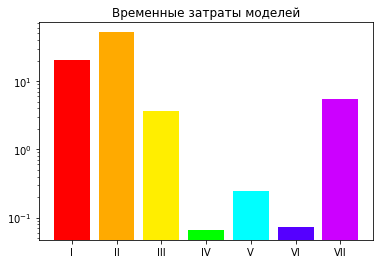

In [82]:
groups = ["I", "II", "III", "IV", "V", "VI", "VII"]
colors = ["#F00", "#FA0", "#FE0", "#0F0", "#0FF", "#50F", "#C0F"]
fig, ax = plt.subplots()
ax.set_yscale('log')
plt.bar(groups, time, color=colors)
plt.title("Временные затраты моделей")
plt.show()

**Точность моделей измерим в количестве непопаданий на 100 000 случаев**

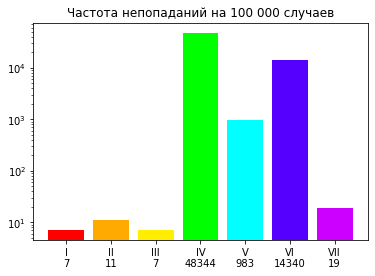

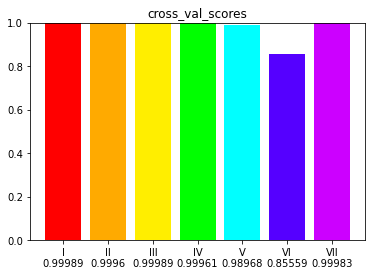

In [83]:
accuracy_1 = [int(100000 * (1 - x)) for x in accuracy]
groups = ["I\n{}".format(accuracy_1[0]), 
          "II\n{}".format(accuracy_1[1]), 
          "III\n{}".format(accuracy_1[2]), 
          "IV\n{}".format(accuracy_1[3]), 
          "V\n{}".format(accuracy_1[4]), 
          "VI\n{}".format(accuracy_1[5]),
          "VII\n{}".format(accuracy_1[6])]
cross_val_scores = [0.9998910251468309,
0.9996000478896436,
0.9998910251468309,
0.9996057664072968,
0.9896832120049062,
0.855585860203084,
0.9998328056416886]
fig, ax = plt.subplots()
ax.set_yscale('log')
plt.bar(groups, accuracy_1, color=colors)
plt.title("Частота непопаданий на 100 000 случаев")
plt.show()

groups = ["I\n{}".format(round(cross_val_scores[0], 5)), 
          "II\n{}".format(round(cross_val_scores[1], 5)),
          "III\n{}".format(round(cross_val_scores[2], 5)),
          "IV\n{}".format(round(cross_val_scores[3], 5)),
          "V\n{}".format(round(cross_val_scores[4], 5)),
          "VI\n{}".format(round(cross_val_scores[5], 5)),
          "VII\n{}".format(round(cross_val_scores[6], 5))]

fig, ax = plt.subplots()
plt.ylim(ymax = 1, ymin = 0)
plt.bar(groups, cross_val_scores, color=colors)
plt.title("cross_val_scores")
plt.show()

# 7. Итоговый результат

**Оптимальной моделью обучения оказалась модель III (отмечена жёлтым цветом).\
Её точность составляет >99.99% (менее 10 ошибок на 100 000 элементов выборки), она лидирует по метрике кросс-валидации, при этом обучение занимает всего 4.13 секунды.ъ
Модель I имеет такую же точность, но по времени она проигрывает - на обучение уходит 48.1 секунды.\
Модели II и VII проигрывают III-ей и по времени, и по точности.\
Модели IV, V и VI обучаются за доли секунд, но на практике они ошибаются довольно часто.\
Самая точная из них (V) ошибается примерно в 1% случаев, а IV и VI и вовсе не годятся для задачи классификации, так как примерно такая же точность получится, если создать модель, которая для любых значений факторов будет предсказывать значение 1 (её точность равна 74.16279656475274 %).**